# Homework 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
# Data: rows 5 through 20 in Table 1
# (copy-pasted from the PDF)
data_str = StringIO("""
1 201 592 61 9 -0.84
2 244 401 25 4 0.31
3 47 583 38 11 0.64
4 287 402 15 7 -0.27
5 203 495 21 5 -0.33
6 58 173 15 9 0.67
7 210 479 27 4 -0.02
8 202 504 14 4 -0.05
9 198 510 30 11 -0.84
10 158 416 16 7 -0.69
11 165 393 14 5 0.30
12 201 442 25 5 -0.46
13 157 317 52 5 -0.03
14 131 311 16 6 0.50
15 166 400 34 6 0.73
16 160 337 31 5 -0.52
17 186 423 42 9 0.90
18 125 334 26 8 0.40
19 218 533 16 6 -0.78
20 146 344 22 5 -0.56
""")

df = pd.read_csv(
    data_str,
    names=['ID','x','y','sigma_y','sigma_x','rho_xy'],
    delim_whitespace=True
)

df.head()

,ID,x,y,sigma_y,sigma_x,rho_xy
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33


## Exercise 1

In [3]:
# cut the first four off
ex1_data = df.iloc[4:]

In [4]:
def lin_regress(x, y, sigma_y):
    N = len(x)
    
    A = np.ones((N, 2))
    A[:, 1] = x
    
    Y = np.ones((N, 1))
    Y[:, 0] = y
    
    C_inv = np.ones((N, 1))
    C_inv[:, 0] = 1. / (sigma_y ** 2)
    
    theta = np.linalg.solve(A.T @ (C_inv * A), A.T @ (C_inv * Y))
    cov = np.linalg.inv(A.T @ (C_inv * A))
    
    return theta, cov

In [5]:
theta, cov = lin_regress(ex1_data['x'].values,
                         ex1_data['y'].values,
                         ex1_data['sigma_y'].values)

b, m = theta.T[0]

with np.printoptions(suppress=True, precision=4):
    print('Parameters:')
    print(theta)
    print()
    print('Covariance matrix:')
    print(cov)

Parameters:
[[34.0477]
 [ 2.2399]]

Covariance matrix:
[[332.9226  -1.8895]
 [ -1.8895   0.0116]]


The above gives that $b = 34.05$, $m = 2.24$.

We can also see that $\sigma^2_m = 0.0116$.

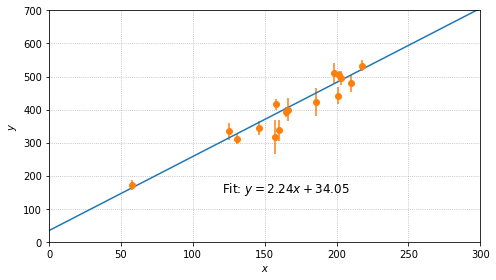

In [6]:
plt.figure(figsize=(7, 4))

xvals = np.linspace(0, 300, 100)
plt.plot(xvals, m * xvals + b)

plt.errorbar(ex1_data['x'], ex1_data['y'],
             yerr=ex1_data['sigma_y'], fmt='o')

plt.xlim(0, 300)
plt.ylim(0, 700)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.grid(ls=':')

plt.text(120, 150, f"Fit: $y = {m:.2f} x + {b:.2f}$", fontsize=12)

plt.tight_layout()

plt.show()

## Exercise 2

In [7]:
# cut the first four off
ex2_data = df.iloc[:]

In [8]:
theta, cov = lin_regress(ex2_data['x'].values,
                         ex2_data['y'].values,
                         ex2_data['sigma_y'].values)

b, m = theta.T[0]

with np.printoptions(suppress=True, precision=4):
    print('Parameters:')
    print(theta)
    print()
    print('Covariance matrix:')
    print(cov)

Parameters:
[[213.2735]
 [  1.0767]]

Covariance matrix:
[[207.1882  -1.0543]
 [ -1.0543   0.006 ]]


From the above matrix, we can read off $\sigma_m^2 = 0.00599$.

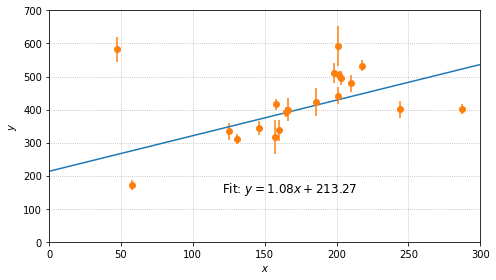

In [9]:
plt.figure(figsize=(7, 4))

xvals = np.linspace(0, 300, 100)
plt.plot(xvals, m * xvals + b)

plt.errorbar(ex2_data['x'], ex2_data['y'],
             yerr=ex2_data['sigma_y'], fmt='o')

plt.xlim(0, 300)
plt.ylim(0, 700)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.grid(ls=':')

plt.text(120, 150, f"Fit: $y = {m:.2f} x + {b:.2f}$", fontsize=12)

plt.tight_layout()

plt.show()

I don't really like the fact that the best fit line _looks_ worse, but the slope has a _smaller_ uncertainty than in exercise 1.

The only real differences about the new points are that they live pretty far off of the best fit line seen in Exercise 1. Three of the four also live outside the _range_ of the original data.

## Exercise 3

In [10]:
# cut the first four off
ex3_data = df.iloc[4:]

In [11]:
def quad_regress(x, y, sigma_y):
    N = len(x)
    
    A = np.ones((N, 3))
    A[:, 1] = x
    A[:, 2] = x ** 2
    
    Y = np.ones((N, 1))
    Y[:, 0] = y
    
    C_inv = np.ones((N, 1))
    C_inv[:, 0] = 1. / (sigma_y ** 2)
    
    theta = np.linalg.solve(A.T @ (C_inv * A), A.T @ (C_inv * Y))
    cov = np.linalg.inv(A.T @ (C_inv * A))
    
    return theta, cov

In [12]:
theta, cov = quad_regress(ex3_data['x'].values,
                          ex3_data['y'].values,
                          ex3_data['sigma_y'].values)

b, m, q = theta.T[0]

with np.printoptions(suppress=True, precision=4):
    print('Parameters:')
    print(theta)
    print()
    print('Covariance matrix:')
    print(cov)

Parameters:
[[72.8946]
 [ 1.5961]
 [ 0.0023]]

Covariance matrix:
[[1514.1091  -21.4672    0.0699]
 [ -21.4672    0.3361   -0.0012]
 [   0.0699   -0.0012    0.    ]]


Uncertainties:
- $\sigma^2_b = 1514.1$
- $\sigma^2_m = 0.3361$
- $\sigma^2_q = 0.00000414$

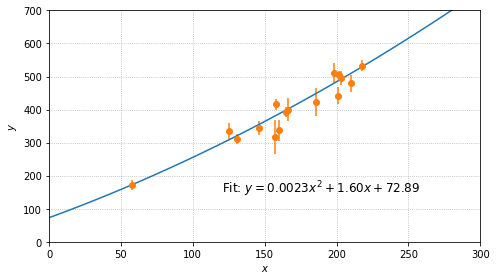

In [13]:
plt.figure(figsize=(7, 4))

xvals = np.linspace(0, 300, 100)
plt.plot(xvals, q * xvals **2 + m * xvals + b)

plt.errorbar(ex3_data['x'], ex3_data['y'],
             yerr=ex3_data['sigma_y'], fmt='o')

plt.xlim(0, 300)
plt.ylim(0, 700)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.grid(ls=':')

plt.text(120, 150, f"Fit: $y = {q:.4f} x^2 + {m:.2f} x + {b:.2f}$", fontsize=12)

plt.tight_layout()

plt.show()

## Exercise 8

In [14]:
# Standard result
theta, cov = lin_regress(ex2_data['x'].values,
                         ex2_data['y'].values,
                         ex2_data['sigma_y'].values)

b_std, m_std = theta.T[0]
std_err = cov[1,1]

print(f"Standard result: {m_std:.3f}")
print(f"Standard variance: {std_err:.4f}")

Standard result: 1.077
Standard variance: 0.0060


In [15]:
# Jackknife method
n = len(ex2_data)
ms = np.zeros(n)
for i in range(n):
    mask = np.ones(n, dtype=bool)
    mask[i] = False
    
    theta, cov = lin_regress(ex2_data['x'].values[mask],
                             ex2_data['y'].values[mask],
                             ex2_data['sigma_y'].values[mask])

    b, m = theta.T[0]
    ms[i] = m
    
jk_avg = np.average(ms)    
jk_err = (n - 1) / n * np.sum(np.square(ms - jk_avg))
print(f"Jackknife result: {jk_avg:.3f}")
print(f"Jackknife variance: {jk_err:.3f}")

Jackknife result: 1.075
Jackknife variance: 0.764


In [16]:
# Bootstrap method
n = len(ex2_data)
num_trials = 1_000
rng = np.random.default_rng()

ms = np.zeros(num_trials)
for i in range(num_trials):
    idx = rng.choice(n, replace=True, size=n)
    
    theta, cov = lin_regress(ex2_data['x'].values[idx],
                             ex2_data['y'].values[idx],
                             ex2_data['sigma_y'].values[idx])

    b, m = theta.T[0]
    ms[i] = m

bs_avg = np.average(ms)
bs_err = 1 / num_trials * np.sum(np.square(ms - m_std))
print(f"Bootstrap average result: {bs_avg:.3f}")
print(f"Bootstrap variance: {bs_err:.3f}")

Bootstrap average result: 1.096
Bootstrap variance: 0.367


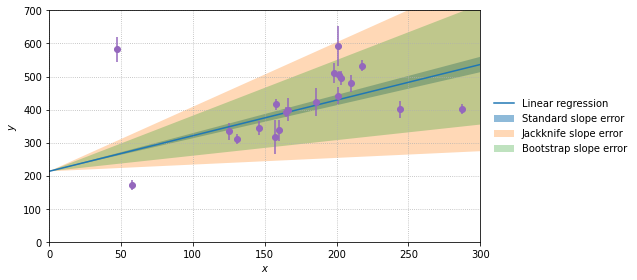

In [17]:
plt.figure(figsize=(7, 4))

xvals = np.linspace(0, 300, 100)
plt.plot(xvals, m_std * xvals + b_std, label='Linear regression', c='C0')
plt.fill_between(xvals, (m_std - np.sqrt(std_err)) * xvals + b_std, (m_std + np.sqrt(std_err)) * xvals + b_std,
                 alpha=0.5, label='Standard slope error')
plt.fill_between(xvals, (m_std - np.sqrt(jk_err)) * xvals + b_std, (m_std + np.sqrt(jk_err)) * xvals + b_std,
                 alpha=0.3, label='Jackknife slope error')
plt.fill_between(xvals, (m_std - np.sqrt(bs_err)) * xvals + b_std, (m_std + np.sqrt(bs_err)) * xvals + b_std,
                 alpha=0.3, label='Bootstrap slope error')
plt.errorbar(ex2_data['x'], ex2_data['y'],
             yerr=ex2_data['sigma_y'], fmt='o', c='C4')

plt.xlim(0, 300)
plt.ylim(0, 700)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.grid(ls=':')
plt.tight_layout()

plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1.01, 0.5))

plt.show()

I think I like the bootstrap error estimate the most, since most of the data seems to be contained within $1\sigma$ of the line when we draw $(m \pm \sigma_m) x + b$. The Jackknife error appears to be a little too wide, and the standard error contains basically _none_ of the data.